In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
# Set working directory
os.chdir("C:/Users/risha/Desktop/Cab_project/cab")

In [3]:
# Checking current  working directory
os.getcwd()

'C:\\Users\\risha\\Desktop\\Cab_project\\cab'

In [4]:
# Load Data training data
cabcount_train = pd.read_csv('train_cab.csv')

# EXPLORATORY DATA ANALYSIS

In [5]:
# Checking the shape of Data
cabcount_train.shape

(16067, 7)

In [6]:
cabcount_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [7]:
type(cabcount_train)

pandas.core.frame.DataFrame

In [8]:
cabcount_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [9]:
cabcount_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
 cabcount_train["fareamount"] = pd.to_numeric(cabcount_train["fare_amount"], downcast='float',errors="coerce")

In [11]:
cabcount_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fareamount
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3


In [12]:
cabcount_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 8 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
fareamount           16042 non-null float32
dtypes: float32(1), float64(5), object(2)
memory usage: 941.5+ KB


In [13]:
cabcount_train = cabcount_train.drop(["fare_amount","pickup_datetime"], axis=1)

In [14]:
cabcount_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fareamount
0,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3


# DATA PREPROCESSING

In [15]:
# Checking the missing value in the DataFrame
missing_val = pd.DataFrame(cabcount_train.isnull().sum())

In [16]:
missing_val

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55
fareamount,25


In [17]:
#Impute with mean
cabcount_train["passenger_count"] = cabcount_train["passenger_count"].fillna(cabcount_train["passenger_count"].mean())
cabcount_train["fareamount"] = cabcount_train["fareamount"].fillna(cabcount_train["fareamount"].mean())

In [18]:
## Outlier Analysis

In [19]:
cabcount_train.info()
# No categorical variable present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 6 columns):
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16067 non-null float64
fareamount           16067 non-null float32
dtypes: float32(1), float64(5)
memory usage: 690.5 KB


In [20]:
cnames = ["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count","fareamount"]

{'whiskers': [<matplotlib.lines.Line2D at 0x2c7b54e1748>,
 'caps': [<matplotlib.lines.Line2D at 0x2c7b54e1dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c7b54e12e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c7b54f54a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c7b54f57f0>],
 'means': []}

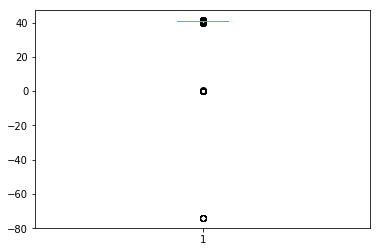

In [21]:
# Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(cabcount_train["dropoff_latitude"])
# Similiar Boxplots can be plotted for other variables too

In [22]:
# Since some variables contains outliers so we remove them to make our dataset free from outliers

In [23]:
for i in cnames:
    q75, q25 = np.percentile(cabcount_train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
     #print(min)
     #print(max)
    
    cabcount_train = cabcount_train.drop(cabcount_train[cabcount_train.loc[:,i] < min].index)
    cabcount_train = cabcount_train.drop(cabcount_train[cabcount_train.loc[:,i] > max].index)

In [24]:
# Checking again the shape of Dataset after removing outliers
cabcount_train.shape

(11695, 6)

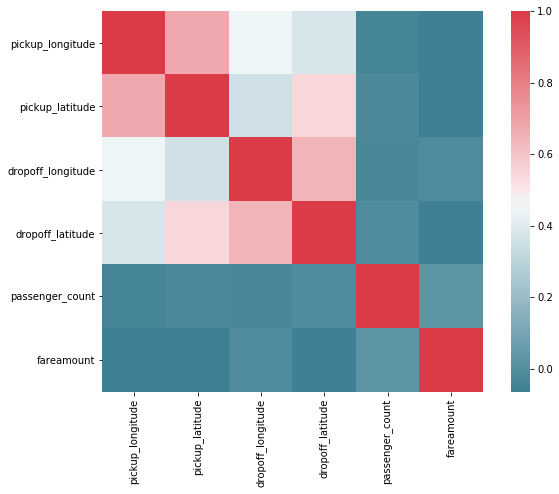

In [25]:
## Feature Selection

# Correlation analysis for continuous variables of Dataset 
# Generate Correlation Matrix
df_corr = cabcount_train.loc[:,cnames]

# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 7))

#Generate correlation matrix
corr = df_corr.corr()

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [26]:
# No variable is highly correlated to other variable so no need to drop any variable from the dataset

In [27]:
# No need for Chisquare test of independence for Feature selection of categorical variables as none is present in our dataset

In [28]:
## Feature Scaling

(array([ 21.,  67.,  36.,  44., 109., 243., 314., 280., 292., 260., 241.,
        304., 380., 458., 603., 511., 555., 517., 510., 721., 490., 535.,
        417., 394., 376., 307., 258., 276., 242., 222., 241., 200., 201.,
        221., 262., 178., 131.,  91.,  64.,  54.,  14.,   5.,  18.,  17.,
          3.,   3.,   5.,   4.]),
 array([-74.018108  , -74.01626319, -74.01441837, -74.01257356,
        -74.01072875, -74.00888394, -74.00703912, -74.00519431,
        -74.0033495 , -74.00150469, -73.99965987, -73.99781506,
        -73.99597025, -73.99412544, -73.99228062, -73.99043581,
        -73.988591  , -73.98674619, -73.98490137, -73.98305656,
        -73.98121175, -73.97936694, -73.97752212, -73.97567731,
        -73.9738325 , -73.97198769, -73.97014287, -73.96829806,
        -73.96645325, -73.96460844, -73.96276362, -73.96091881,
        -73.959074  , -73.95722919, -73.95538437, -73.95353956,
        -73.95169475, -73.94984994, -73.94800512, -73.94616031,
        -73.9443155 , -73.9424

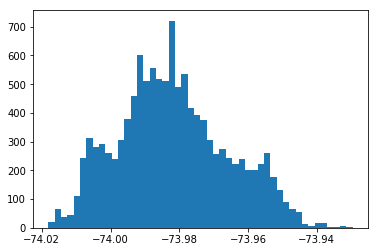

In [29]:
# Normality check
%matplotlib inline  
plt.hist(cabcount_train["pickup_longitude"], bins='auto')

(array([  7.,  38.,  56.,  64.,  85., 142., 226., 293., 236., 245., 234.,
        241., 271., 332., 438., 563., 555., 503., 493., 504., 648., 548.,
        561., 474., 437., 383., 307., 269., 238., 213., 210., 229., 206.,
        204., 225., 251., 206., 126., 113., 113.,  48.,  31.,  32.,  31.,
         20.,   8.,  16.,  14.,   8.]),
 array([-74.019535  , -74.01769796, -74.01586092, -74.01402388,
        -74.01218684, -74.0103498 , -74.00851276, -74.00667571,
        -74.00483867, -74.00300163, -74.00116459, -73.99932755,
        -73.99749051, -73.99565347, -73.99381643, -73.99197939,
        -73.99014235, -73.98830531, -73.98646827, -73.98463122,
        -73.98279418, -73.98095714, -73.9791201 , -73.97728306,
        -73.97544602, -73.97360898, -73.97177194, -73.9699349 ,
        -73.96809786, -73.96626082, -73.96442378, -73.96258673,
        -73.96074969, -73.95891265, -73.95707561, -73.95523857,
        -73.95340153, -73.95156449, -73.94972745, -73.94789041,
        -73.94605337, -7

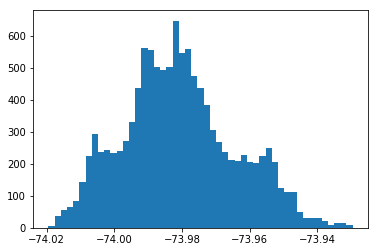

In [30]:
%matplotlib inline  
plt.hist(cabcount_train["dropoff_longitude"], bins='auto')

In [ ]:
# Since by checking different variables we come to know that our continuous variables data is not Normally distributed so we are going to use Normalization method of Feature Scaling

In [31]:
# Nomalisation
for i in cnames:
    #print(i)
    cabcount_train[i] = (cabcount_train[i] - np.min(cabcount_train[i]))/(np.max(cabcount_train[i]) - np.min(cabcount_train[i]))

In [32]:
cabcount_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fareamount
1,0.023263,0.156224,0.447337,0.745310,0.333333,0.913513
2,0.399431,0.578788,0.314314,0.483539,0.666667,0.308108
3,0.349832,0.340922,0.310704,0.546230,0.333333,0.416216
4,0.564793,0.635770,0.698550,0.759947,0.333333,0.286487
5,0.193606,0.328126,0.518169,0.547404,0.333333,0.654054


# MODEL DEVELOPMENT

In [33]:
# Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [34]:
# Divide data into train and test for model Development
X = cabcount_train.values[:, 0:5]
Y = cabcount_train.values[:,5]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [35]:
## DECISION TREE

In [36]:
# Model Development
DT_model = tree.DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

In [37]:
# Predict new test cases
predictions_DT = DT_model.predict(X_test)

In [38]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_DT))
MAPE = metrics.mean_absolute_error(y_test, predictions_DT)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, predictions_DT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_DT)))

MAE: 0.14181602659490603
MAPE: 14.181602659490602
MSE: 0.03183425036933897
RMSE: 0.1784215524238565


In [39]:
## RANDOM FOREST

In [40]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Develop and train random forest model
RF_model = RandomForestRegressor(n_estimators = 10).fit(X_train, y_train)

In [42]:
# Predict new test cases
RF_Predictions = RF_model.predict(X_test)

In [43]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, RF_Predictions))
MAPE = metrics.mean_absolute_error(y_test, RF_Predictions)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, RF_Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_Predictions)))

MAE: 0.08484306361784265
MAPE: 8.484306361784265
MSE: 0.012912566667796574
RMSE: 0.11363347511977522


In [ ]:
## LINEAR REGRESSION

In [44]:
# Import libraries for LR
from sklearn.linear_model import LinearRegression

In [45]:
# Train the model using the training sets
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Predict the test cases using Linear Regression model
LR_predictions = lm.predict(X_test)

In [47]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, LR_predictions))
MAPE = metrics.mean_absolute_error(y_test, LR_predictions)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, LR_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, LR_predictions)))

MAE: 0.14864871305584834
MAPE: 14.864871305584835
MSE: 0.03445213367764688
RMSE: 0.18561285967746652


In [ ]:
#KNN K NEAREST NEIGHBOUR

In [48]:
# Import libraries
from sklearn.neighbors import KNeighborsRegressor

In [49]:
# Train KNN model
KNN_model = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)

In [50]:
# Predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [51]:
# Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, KNN_Predictions))
MAPE = metrics.mean_absolute_error(y_test, KNN_Predictions)
print("MAPE:", MAPE*100)
print('MSE:', metrics.mean_squared_error(y_test, KNN_Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, KNN_Predictions)))

MAE: 0.08543941084437791
MAPE: 8.54394108443779
MSE: 0.013762374467597194
RMSE: 0.1173131470364562


# PREDICT TARGET VARIABLE

In [ ]:
# Now since we have tested all the Machine Learning Algorithms on our Training Data and retrieved the accuracy from each model

In [52]:
# Load Data testing data
cab_test = pd.read_csv("test.csv")

In [53]:
cab_test.shape

(9914, 6)

In [54]:
cab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [55]:
cab_test["passenger_count"] = cab_test.passenger_count.astype(float)

In [56]:
cab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null float64
dtypes: float64(5), object(1)
memory usage: 464.8+ KB


In [57]:
cont_names = ["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]

In [58]:
# Nomalisation
for i in cont_names:
    #print(i)
    cab_test[i] = (cab_test[i] - np.min(cab_test[i]))/(np.max(cab_test[i]) - np.min(cab_test[i]))

In [59]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,0.220338,0.167776,0.221502,0.155060,0.0
1,2015-01-27 13:08:24 UTC,0.209638,0.128686,0.207781,0.150950,0.0
2,2011-10-08 11:53:44 UTC,0.213066,0.156736,0.222898,0.157102,0.0
3,2012-12-01 21:12:12 UTC,0.214143,0.171297,0.214414,0.161976,0.0
4,2012-12-01 21:12:12 UTC,0.226085,0.190628,0.215894,0.155584,0.0


In [60]:
# Drop the columns from the Dataset as our model is not trained for it
cab_test = cab_test.drop(["pickup_datetime"], axis=1)

In [61]:
cab_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0.220338,0.167776,0.221502,0.155060,0.0
1,0.209638,0.128686,0.207781,0.150950,0.0
2,0.213066,0.156736,0.222898,0.157102,0.0
3,0.214143,0.171297,0.214414,0.161976,0.0
4,0.226085,0.190628,0.215894,0.155584,0.0


In [62]:
cab_test['target_amt'] = KNN_model.predict(cab_test)

In [63]:
cab_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,target_amt
0,0.220338,0.167776,0.221502,0.155060,0.0,0.250450
1,0.209638,0.128686,0.207781,0.150950,0.0,0.308108
2,0.213066,0.156736,0.222898,0.157102,0.0,0.308108
3,0.214143,0.171297,0.214414,0.161976,0.0,0.308108
4,0.226085,0.190628,0.215894,0.155584,0.0,0.250450


In [ ]:
# Our 'target_amt' column gets added to as the last column of the dataset

In [64]:
# Now writing this new dataset wit predicted variable as a CSV file
cab_test.to_csv('cab_test_predict.csv',index=False)

# THANKYOU